In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd


In [2]:
url="./input/diabetes.csv"
dataset = pd.read_csv(url)
dataset.info()
#Pregnancies:              Number of times pregnant
#Glucose:                  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#BloodPressure:            Diastolic blood pressure (mm Hg)
#SkinThickness:            Triceps skin fold thickness (mm)
#Insulin:                  2-Hour serum insulin (mu U/ml)
#BMI:                      Body mass index (weight in kg/(height in m)^2)
#DiabetesPedigreeFunction: Diabetes pedigree function
#Age:                      in years
#Outcome:                  Whether patient is diabetic (1) or not (0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [64]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
dataset.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [67]:
dataset.index

RangeIndex(start=0, stop=768, step=1)

In [68]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
dataset.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [70]:
dataset.shape

(768, 9)

# modeling

In [11]:
X = dataset.iloc[:,:-1]
X.shape

(768, 8)

In [73]:
#y = dataset.iloc[:,[-1]]
y = dataset.Outcome
y.shape

(768,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state = 0)


In [75]:
X_train.shape

(537, 8)

In [76]:
y_train.shape

(537,)

In [77]:
 X_test.shape

(231, 8)

In [78]:
y_test.shape

(231,)

In [79]:
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [80]:
y_pred = classifier.predict(X_test)


In [81]:
cm = confusion_matrix(y_test, y_pred)


In [82]:
cm

array([[142,  15],
       [ 37,  37]], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       157
           1       0.71      0.50      0.59        74

    accuracy                           0.77       231
   macro avg       0.75      0.70      0.72       231
weighted avg       0.77      0.77      0.76       231



In [84]:
classifier.score(X_test,y_test)

0.7748917748917749

In [85]:
# pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

In [87]:
y=pd.DataFrame(y_pred)
y.to_csv('./output/out.csv',index=False,header=False)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

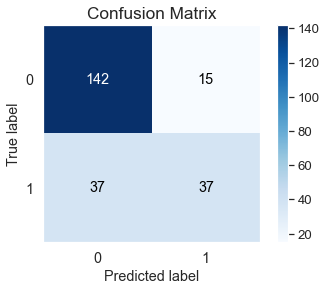

In [88]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=False)

In [89]:
p1=classifier.predict(np.array([[6,148,72,35,0,33,0.6,50]]))
print(p1)
p2=classifier.predict(np.array([[1,85,66,29,0,26.6,0.35,31]]))
print(p2)

[1]
[0]


In [90]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
import seaborn as sns

Text(0.5, 1.0, 'Diabetes Pedigree Function vs. Outcome')

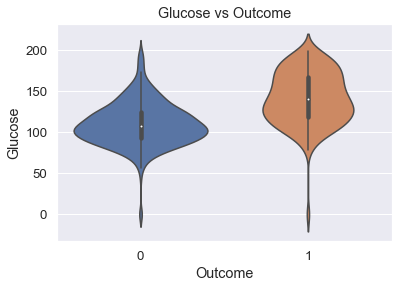

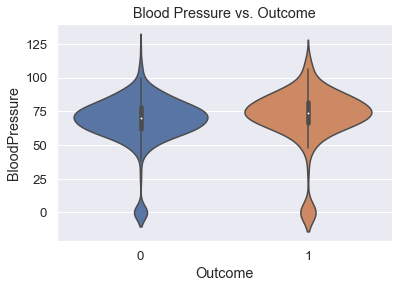

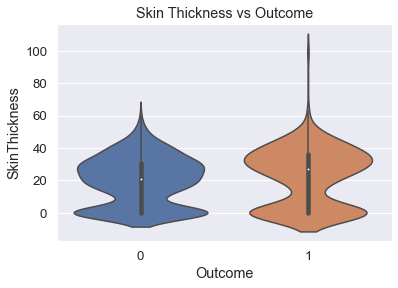

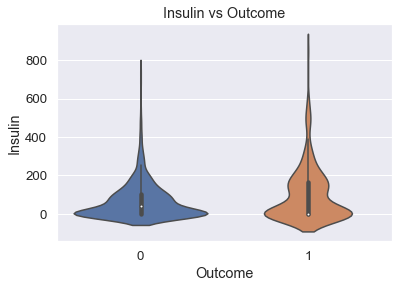

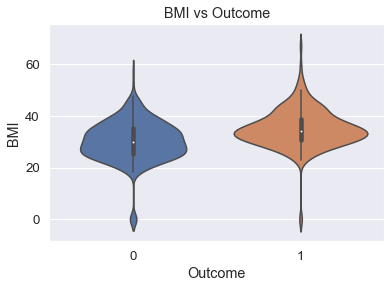

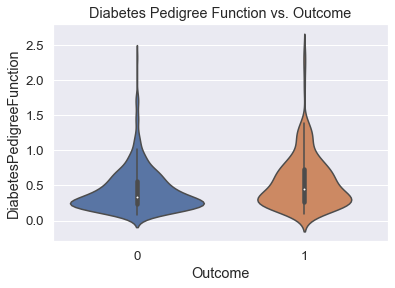

In [92]:
 plt.figure(1)
sns.violinplot(x='Outcome',y='Glucose',data=dataset)
plt.title('Glucose vs Outcome')
plt.figure(2)
sns.violinplot(x='Outcome',y='BloodPressure',data=dataset)
plt.title('Blood Pressure vs. Outcome')
plt.figure(3)
sns.violinplot(x='Outcome',y='SkinThickness',data=dataset)
plt.title('Skin Thickness vs Outcome')
plt.figure(4)
sns.violinplot(x='Outcome',y='Insulin',data=dataset)
plt.title('Insulin vs Outcome')
plt.figure(5)
sns.violinplot(x='Outcome',y='BMI',data=dataset)
plt.title('BMI vs Outcome')
plt.figure(6)
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=dataset)
plt.title('Diabetes Pedigree Function vs. Outcome')

Text(0.5, 1.0, 'Correlation between various numerical parameters in dataset')

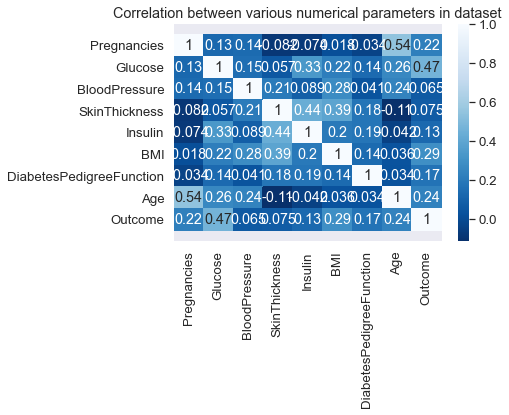

In [93]:
mat=dataset.corr()
ax=sns.heatmap(mat,annot=True,fmt='.2g',cmap='Blues_r')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlation between various numerical parameters in dataset')


In [94]:
dataset.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [95]:
positive_df=dataset[dataset['Outcome']==1]
negative_df=dataset[dataset['Outcome']==0]

positive_df=positive_df.replace({'Glucose':0},np.median(positive_df['Glucose']))
negative_df=negative_df.replace({'Glucose':0},np.median(negative_df['Glucose']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [96]:
positive_df=positive_df.replace({'BloodPressure':0},np.median(positive_df['BloodPressure']))
negative_df=negative_df.replace({'BloodPressure':0},np.median(negative_df['BloodPressure']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [97]:
positive_df=positive_df.replace({'SkinThickness':0},np.median(positive_df['SkinThickness']))
negative_df=negative_df.replace({'SkinThickness':0},np.median(negative_df['SkinThickness']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [98]:
positive_df=positive_df.replace({'Insulin':0},np.median(positive_df['Insulin']))
negative_df=negative_df.replace({'Insulin':0},np.median(negative_df['Insulin']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [99]:
positive_df=positive_df.replace({'BMI':0},np.median(positive_df['BMI']))
negative_df=negative_df.replace({'BMI':0},np.median(negative_df['BMI']))
df=[positive_df,negative_df]
diabetes_df=pd.concat(df)

In [100]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.378906,27.43099,91.783854,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.104431,9.32146,108.121136,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.00000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.00000,39.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.00000,39.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.00000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.00000,846.000000,67.100000,2.420000,81.000000,1.000000


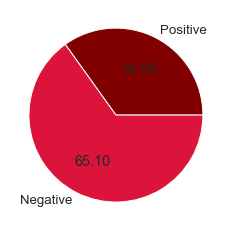

In [101]:
l1=len(positive_df)
l2=len(negative_df)
values=[round(l1/(l1+l2)*100,2),round(l2/(l1+l2)*100,2)]
label=['Positive','Negative']
plt.pie(x=[l1,l2],labels=label,autopct='%.2f',colors=['maroon','crimson'])
plt.show()

In [102]:
preg_0=dataset[dataset['Pregnancies']==0]
preg_1=dataset[dataset['Pregnancies']==1]
preg_2=dataset[dataset['Pregnancies']==2]
preg_3=dataset[dataset['Pregnancies']==3]
preg_4=dataset[dataset['Pregnancies']==4]
preg_5=dataset[dataset['Pregnancies']==5]
preg_6=dataset[dataset['Pregnancies']==6]
preg_7=dataset[dataset['Pregnancies']==6]
preg_8=dataset[dataset['Pregnancies']==8]
preg_9=dataset[dataset['Pregnancies']==9]
preg_10=dataset[dataset['Pregnancies']==10]
preg_11=dataset[dataset['Pregnancies']==11]
preg_12=dataset[dataset['Pregnancies']==12]
preg_13=dataset[dataset['Pregnancies']==13]
preg_14=dataset[dataset['Pregnancies']==14]
preg_15=dataset[dataset['Pregnancies']==15]
preg_16=dataset[dataset['Pregnancies']==16]
preg_17=dataset[dataset['Pregnancies']==17]

In [103]:
import scipy.stats as st
print(st.shapiro(positive_df['BloodPressure'])[1],st.shapiro(negative_df['BloodPressure'])[1])
print(st.mannwhitneyu(negative_df['BloodPressure'],positive_df['BloodPressure'],alternative='less'))

0.001056027365848422 0.0004950868315063417
MannwhitneyuResult(statistic=52131.0, pvalue=1.867937406180911e-07)


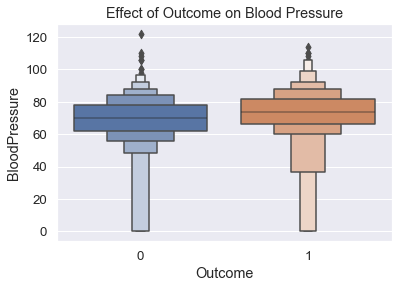

In [104]:
sns.boxenplot(x='Outcome',y='BloodPressure',data=dataset)
plt.title('Effect of Outcome on Blood Pressure')
plt.show()

In [105]:
mu=80
bp=[]
for i in positive_df['BloodPressure']:
    bp.append(i-mu)
    
st.wilcoxon(bp,alternative='greater')

WilcoxonResult(statistic=8576.0, pvalue=0.9999999999762162)

In [106]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['BloodPressure']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

5
ShapiroResult(statistic=0.8932729363441467, pvalue=0.025970375165343285)


In [107]:
print(st.kruskal(preg_0['BloodPressure'],preg_1['BloodPressure'],preg_2['BloodPressure'],preg_3['BloodPressure'],preg_4['BloodPressure'],preg_5['BloodPressure'],preg_6['BloodPressure'],preg_7['BloodPressure'],preg_8['BloodPressure'],preg_9['BloodPressure'],preg_10['BloodPressure'],preg_11['BloodPressure'],preg_12['BloodPressure'],preg_13['BloodPressure'],preg_14['BloodPressure'],preg_15['BloodPressure'],preg_17['BloodPressure']))

KruskalResult(statistic=58.51831857876596, pvalue=9.280495211248015e-07)


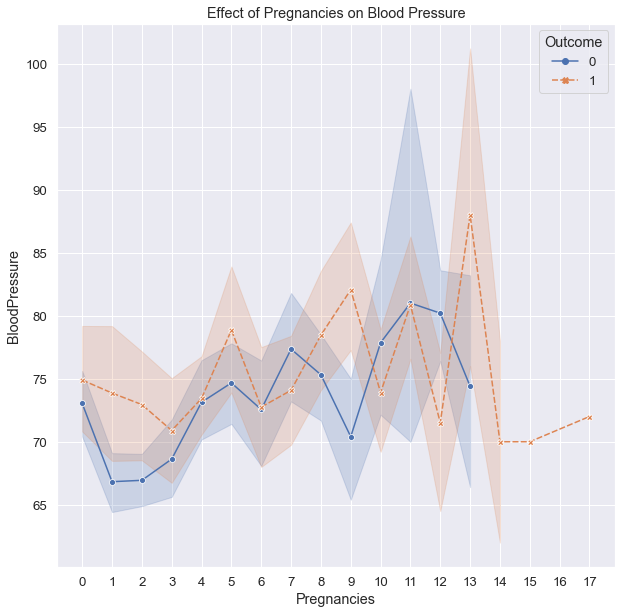

In [108]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BloodPressure',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on Blood Pressure')
plt.show()

In [109]:
print("Shapiro: ",st.shapiro(positive_df['BMI'])[1],st.shapiro(negative_df['BMI'])[1])
print(st.mannwhitneyu(negative_df['BMI'],positive_df['BMI'],alternative='less'))

Shapiro:  4.468937575552445e-08 4.4733014874509536e-06
MannwhitneyuResult(statistic=41626.0, pvalue=2.379984980745742e-18)


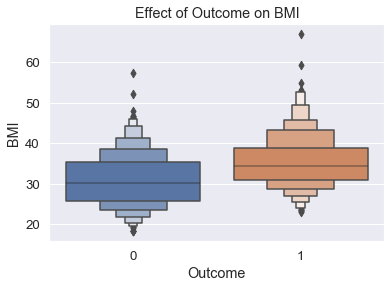

In [110]:
sns.boxenplot(x='Outcome',y='BMI',data=diabetes_df)
plt.title('Effect of Outcome on BMI')
plt.show()

In [111]:
mu=36
bmi=[]
for i in positive_df['BMI']:
    bmi.append(i-mu)
print(st.wilcoxon(bmi,alternative='greater'))

WilcoxonResult(statistic=14435.5, pvalue=0.9968762501767908)


In [112]:
for i in range(18):
    p=positive_df[positive_df['Pregnancies']==i]['BMI']
    if st.shapiro(p)[1]>0.95 or st.shapiro(p)[1]<0.05:
        print(i)
        print(st.shapiro(p))
        break

0
ShapiroResult(statistic=0.8856268525123596, pvalue=0.0010262097930535674)


In [113]:
print(st.kruskal(preg_0['BMI'],preg_1['BMI'],preg_2['BMI'],preg_3['BMI'],preg_4['BMI'],preg_5['BMI'],preg_6['BMI'],preg_7['BMI'],preg_8['BMI'],preg_9['BMI'],preg_10['BMI'],preg_11['BMI'],preg_12['BMI'],preg_13['BMI'],preg_14['BMI'],preg_15['BMI'],preg_17['BMI']))

KruskalResult(statistic=38.43625712491246, pvalue=0.0013108888110873436)


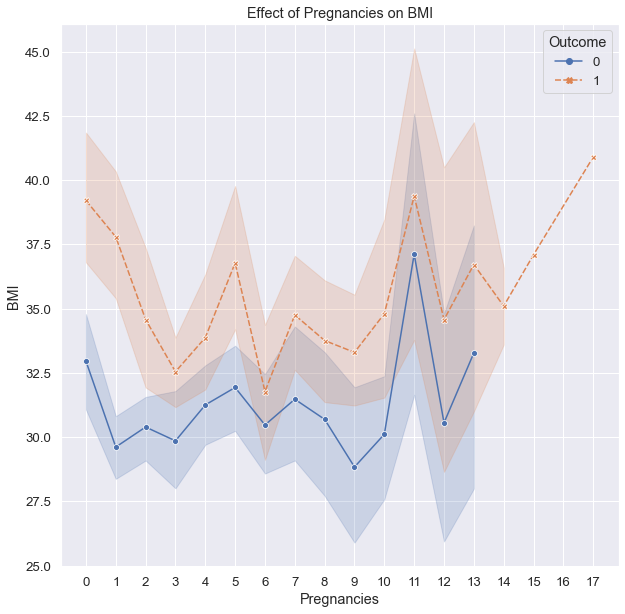

In [114]:
plt.figure(figsize=(10,10))
ax=sns.lineplot(x='Pregnancies',y='BMI',data=diabetes_df,hue='Outcome',style='Outcome',markers=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.title('Effect of Pregnancies on BMI')
plt.show()

Total zero value of Glucose: 5
Total zero value of BloodPressure: 35
Total zero value of SkinThickness: 227
Total zero value of Insulin: 374
Total zero value of BMI: 11
Total zero value of DiabetesPedigreeFunction: 0
Total zero value of Pregnancies: 111
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Pregnancies


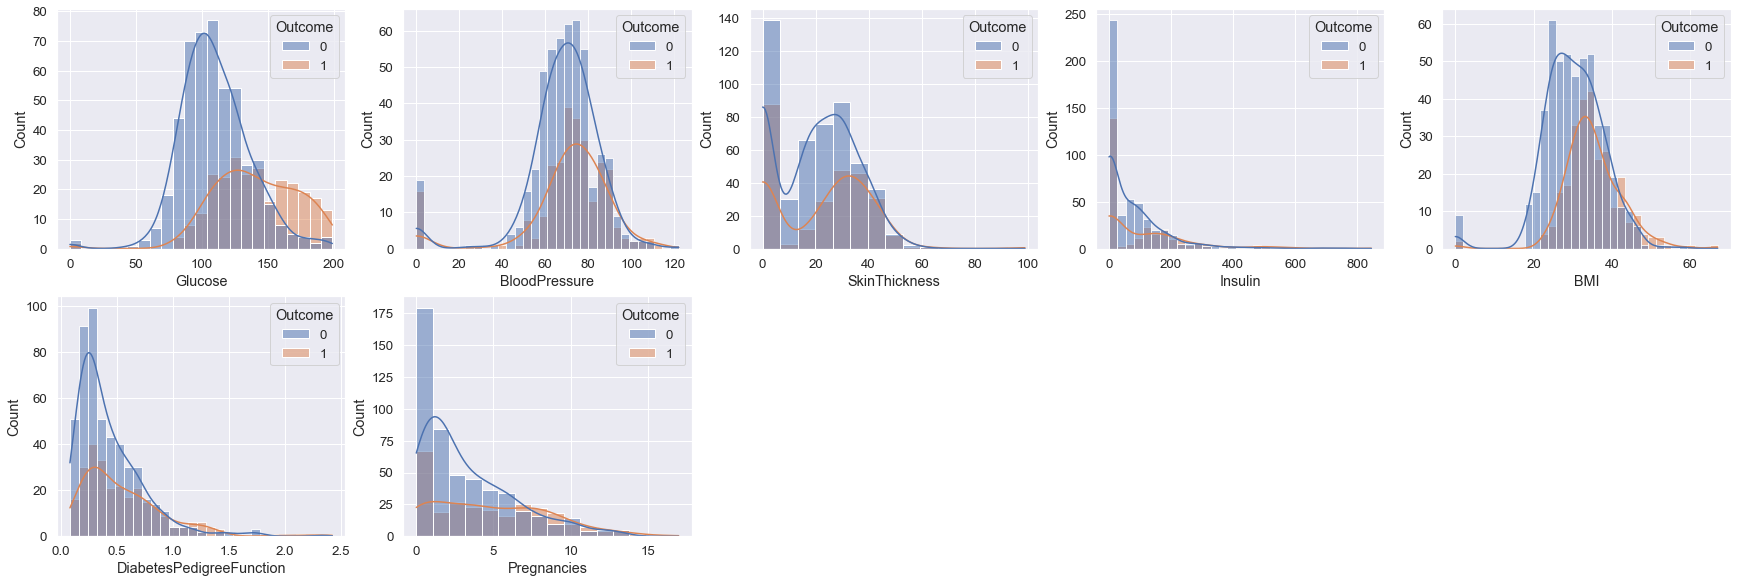

In [115]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies']
for col in cols:
    print(f"Total zero value of {col}: {len(dataset[dataset[col]==0])}")
print("=====================================================================")
sns.set(font_scale=1.2)
plt.figure(figsize=(30,15))

for index, column in enumerate(cols,1):
    plt.subplot(3,5, index)
    print(column)
    sns.histplot(dataset, x=column,hue='Outcome', kde=True)

In [116]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


<AxesSubplot:>

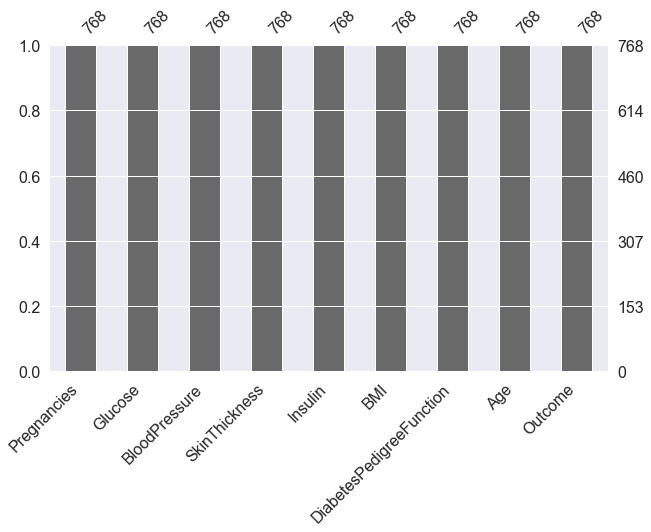

In [117]:
#pip install missingno
import missingno as msno
msno.bar(dataset,figsize=(10,6))

In [123]:
def information(col=2, cut_points=1, labels=None):
    print("1-information")
    print("=============")
    print(dataset.info())
    print("")
    print("2-description")
    print("=============")
    print(dataset.describe())
    print("")
    print("3-head")
    print("=============")
    dataset.head(4)

In [124]:
information()

1-information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

2-description
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.

In [125]:
dataset.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
